# Introduction
In many ways, regression analysis lives at the heart of statistics. It’s a broad term for a set of methodologies used to predict a response variable (also called a dependent, criterion, or outcome variable) from one or more predictor variables (also called independent or explanatory variables).

Regression analysis can be used to identify the explanatory variables that are related to a response variable, to describe the form of the relationships involved, and to provide an equation for predicting the response variable from the explanatory variables.

The term **regression** can be confusing because there are so many specialised varieties. In addition, R has powerful and comprehensive features for fitting regression models, and the abundance of options can be confusing as well.

We’ll focus on regression methods described as **Ordinary Least Squares (OLS)** regression, including: <br>
**Simple linear regression** - Predicting a quantitative response variable from a quantitative explanatory variable.<br>
**Polynomial regression** - Predicting a quantitative response variable from a quantitative explanatory variable, where the relationship is modelled as an nth order polynomial.<br>
**Multiple linear regression** - Predicting a quantitative response variable from two or more explanatory variables.<br>

OLS regression is the most common variety of statistical analysis today.

## Goal of OLS regression
The goal of OLS regression is to select model parameters (intercept and slopes) that minimise the difference between actual response values and those predicted by the model. 

Specifically, model parameters are selected to minimise the sum of squared residuals. To properly interpret the coefficients of the OLS model, you must satisfy a number of statistical assumptions:<br>
**Normality** - For fixed values of the independent variables, the dependent variable is normally distributed.<br>
**Independence** - The Y<sub>i</sub> values are independent of each other.<br>
**Linearity** - The dependent variable is linearly related to the independent variables.<br>
**Variance** - dependent variable doesn’t vary with the levels of the independent variables.<br>

If you violate these assumptions, your statistical significance tests and confidence intervals may not be accurate.
**Note** that OLS regression also assumes that the independent variables are fixed and measured without error, but this assumption is typically relaxed in practice.

## Fitting regression models
In R, the basic **function** for fitting a linear model is lm(). The format is<br>

		my_fit <- lm(formula, data)
where <br>
**formula** - describes the model to be fit.<br>
**data** - the data frame containing the data to be used in fitting the model.<br>

The resulting object (`my_fit`) is a list that contains extensive information about the fitted model.<br>

The formula part of the **function** is typically written as<br>
        **Y ~ X1 + X2 + ... + Xk**
        
In this formula the **~** separates the dependent (response) variable on the left from the independent (predictor) variables on the right.

And the predictor variables are separated by + signs. Other symbols can be used to modify the formula in various ways.

## Simple linear regression
Simple linear regression is a statistical method that allows us to summarise and study relationships between two continuous (quantitative) variables:
One variable, denoted `x` is regarded as the predictor, explanatory, or independent variable. 

The other variable, denoted `y` is regarded as the response, outcome, or dependent variable. 
Because the other terms are used less frequently today, we'll use the **predictor** and **response** terms to refer to the variables. The other terms are mentioned only to make you aware of them.

Simple linear regression gets its adjective **simple** because it concerns the study of only one predictor variable. 

In contrast, multiple linear regression gets its adjective **multiple** because it concerns the study of two or more predictor variables.

We are interested in statistical relationships, in which the relationship between the variables is not perfect.

# Simple example - demonstration of linear principles
We’ll examine the relationship between `height` and `weight` for 15 women between ages 30 – 39 using the built-in dataset called `women`.

We want to predict weight from height. Having an equation for predicting weight from height can help us to identify overweight or underweight individuals.

In [2]:
# Demo uses the dataset "women" containing 
# height and weight for 15 women aged between 30 - 39
# dependent variable = weight
# independent variable = height
simple_linear_model <- lm(weight ~ height, data=women)

Lets view the model. This shows us the intercept and beta coefficient for `height` variable 

ie weight = -87.52 + 3.45 x height.

In [3]:
simple_linear_model


Call:
lm(formula = weight ~ height, data = women)

Coefficients:
(Intercept)       height  
     -87.52         3.45  


We can use the `plot()` function to show this information.  

The graph shows a linearly increasing relationshio between height and weight. Remember that one assumption of linear regression is that the relationship between response (`weight`) and predictor (`height`) variables is linear and additive.

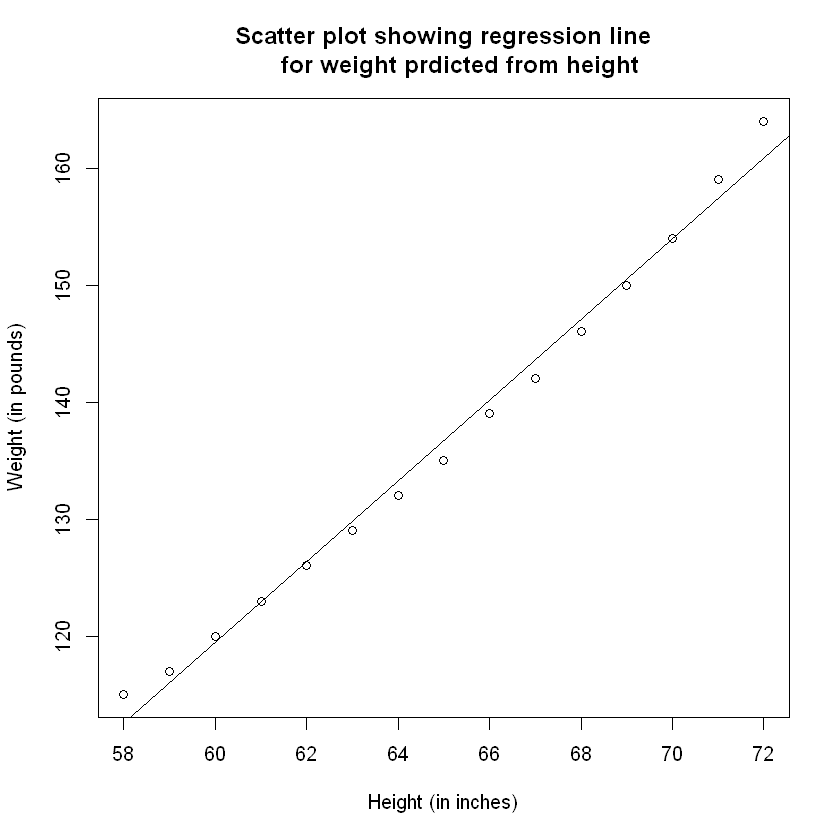

In [4]:
plot(women$height,women$weight,
     xlab="Height (in inches)",
     ylab="Weight (in pounds)",
     main = "Scatter plot showing regression line
     for weight prdicted from height")
abline(simple_linear_model)

We can have a more detailed look at the data using the `summary()` function.

In [5]:
summary(simple_linear_model)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


The output of `summary()` shows us some important inforamtion.<br>

`Call` -  Shows the function call used to compute the regression model.<br>
`Residuals` - Provide a quick view of the distribution of the residuals, which by definition have a mean zero. Therefore, median should not be far from zero, and the minimum and maximum should be roughly equal in absolute value.<br>
`Coefficients` - shows the regression beta coefficients and their statistical significance. Predictor variables that are significantly associated to the outcome variable are marked by stars. The standard errors (SE) defines the accuracy of beta coefficients. For a given beta coefficient, the SE reflects how the coefficient varies under repeated sampling. It can be used to compute the confidence intervals and the t-statistic.

The `t-statistic` and the associated `p-value` defines the statistical significance of the beta coefficients. The t-statistic measures the number of standard deviations that the beta coefficient b is away from 0. Thus a large t-statistic will produce a small p-value. The higher the t-statistic (and the lower the p-value), the more significant the predictor. 

The symbols to the right visually specifies the level of significance. The line below the table shows the definition of these symbols; one star means 0.01 < p < 0.05. The more the stars beside the variable’s p-value, the more significant the variable.<br>

**Recall** - Hypothesis are as follows<br>
**H0** - coefficients are equal to zero (i.e., no relationship between x and y)<br>
**H1** - coefficients are not equal to zero (i.e., there is some relationship between x and y)<br>


`Residual standard error (RSE)`, R-squared (R2) and the F-statistic are metrics that are used to check how well the model fits to our data. The standard error measures the variability/accuracy of the beta coefficients. It can be used to compute the confidence intervals of the coefficients.

For example, the 95% confidence interval for the coefficient b1 is defined as 
			b1 +/- 2*SE(b1)
where:<br>
the lower limits of b1 = b1 - 2*SE(b1) = 3.45 - 2*0.09114 = 3.253112<br>
the upper limits of b1 = b1 + 2*SE(b1) = 3.45 + 2*0.09114 = 3.646888<br>
That is, there is approximately a 95% chance that the interval **3.25, 3.64** will contain the true value of b1. <br>
Similarly the 95% confidence interval for b0 can be computed as b0 +/- 2*SE(b0).<br>



This informarion shows us that the prediction equation for **height i** is defined as:

**weight = -87.52 + 3.45 x height**

Since a `height` of 0 is imposible, we wouldn't give a physical representation to the intercept. It is just an adjustment constant.

# Correlation co-efficiant
The correlation coefficient measures the level of the association between two variables. Its value ranges between -1 (perfect negative correlation: x increases, y decreases)  and +1 (perfect positive correlation: when x increases, y increases).

A value closer to 0 suggests a weak relationship between the variables. A low correlation (-0.2 < x < 0.2) probably suggests that much of variation of the outcome variable (y) is not explained by the predictor (x). 

In such case, we should probably look for better predictor variables.

Lets examine the correlation between the `women` dataset for `height` and `weight` variables.

To get this confidence information described above, type the following:

In [6]:
confint(simple_linear_model)

,2.5 %,97.5 %
(Intercept),-100.342655,-74.690679
height,3.253112,3.646888


In this example, the correlation coefficient is large enough, so we can continue by building a linear model of y as a function of x.

In [7]:
cor(women$height, women$weight)

[1] 0.9954948

# Model accuracy - goodness of fit
Once you identified that, at least, one predictor variable is significantly associated the outcome, you should continue the diagnostic by checking how well the model fits the data. 
This process is also referred to as the **goodness-of-fit**.

The overall quality of the linear regression fit can be assessed using the following three quantities, displayed in the model summary:<br>
**The Residual Standard Error (RSE)**.<br>
The **R-squared (R2)**<br>
**F-statistic**<br>

Lets examine these goodness of fit values.

In [8]:
# Rerunning summary command
summary(simple_linear_model)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


### **Residual standard error (RSE)** 
This is the residual variation, representing average variation of observation points around the fitted regression line. This is the standard deviation of residual errors.

RSE provides absolute measure of patterns in the data that can’t be explained by the model. When comparing two models, the model with the smallest RSE is a good indication that this model fits the best the data.

Dividing the RSE by the average value of the outcome variable (1.525 in this example) will give you the prediction error rate, which should be as small as possible.

In our example, RSE = 1.525, meaning that the observed weight values (inches) deviate from the true regression line by approximately 1.5 units on average.

Whether or not an RSE of 1.525 units is an acceptable prediction error is subjective and depends on the problem context.

### **R-squared (r2)**
The **R-squared (R2)** ranges from 0 to 1 and represents the proportion of information (i.e. variation) in the data that can be explained by the model. 

The adjusted R-squared adjusts for the degrees of freedom.

The R2  measures how well the model fits the data. For simple linear regression, R2 is the square of the Pearson correlation coefficient.

A high value of R2  is a good indication. However, as the value of R2  tends to increase when more predictors are added in the model, such as in multiple linear regression model, you should mainly consider the adjusted R-squared, which is a penalised R2  for a higher number of predictors.

An (adjusted) R2  that is close to 1 indicates that a large proportion of the variability in the outcome has been explained by the regression model. A number near 0 indicates that the regression model did not explain much of the variability in the outcome.

### F-statistic

The F-statistic gives the overall significance of the model. It assess whether at least one predictor variable has a non-zero coefficient.

In a simple linear regression, this test is not really interesting since it just duplicates the information in given by the t-test, available in the coefficient table. In fact, the F test is identical to the square of the t test: 1433 = (37.85)^2. This is true in any model with 1 degree of freedom.

The F-statistic becomes more important once we start using multiple predictors as in multiple linear regression.

A large F-statistic will corresponds to a statistically significant p-value (p < 0.05). In our example, the F-statistic equal 1433 producing a p-value of 1.091e-14, which is highly significant.